In [57]:
# Library Package
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

# Folder Path
files = './training/training.csv'

# Regular Expression
regex_wage = r'(\$[0-9,]{2,}[kK]?)'
regex_pday = r'(per day)|(p.d)'
regex_html = r'(<[^>]+>)'

%matplotlib inline

In [48]:
frame = pd.read_csv(files, sep='|')
frame.head()

,content,industries,location,title,type_empl,url,wage
0,Amgen is committed to unlocking the potential ...,Healthcare & Medical,"Sydney, Ryde & Macquarie Park","Transformation, Senior Manager - Data, Analyti...",Full Time,https://www.seek.com.au/job/38884116?type=prom...,NaN
1,"Our client, a respected and leading global ban...",Science & Technology,"Sydney, CBD, Inner West & Eastern Suburbs",Senior Analyst | Customer Insights | Banking J...,Full Time,https://www.seek.com.au/job/38983503?type=stan...,NaN
2,We are looking for an experienced Senior Busin...,Information & Communication Technology,"Sydney, North Shore & Northern Beaches","Senior Business Analyst, Data & Analytics (Cor...",Contract/Temp,https://www.seek.com.au/job/38980384?type=stan...,NaN
3,Senior Data Analysts - check this out! This is...,"Advertising, Arts & Media","Sydney, CBD, Inner West & Eastern Suburbs",Data and Analytics Director Job in Sydney - SEEK,Full Time,https://www.seek.com.au/job/39005312?type=stan...,NaN
4,We'll have you working with Australia's most r...,Accounting,"Sydney, CBD, Inner West & Eastern Suburbs",Forensic Technology/Data Analytics - Senior Co...,Full Time,https://www.seek.com.au/job/38991024?type=stan...,NaN


In [49]:
frame['wage']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6       ['Salary from $118,513 to $137,829 (depending ...
7                                                     NaN
8                 Excelent Package plus Career Investment
9                                    $700 - $1000 per day
10      ['Salary from $118,513 to $137,829 (depending ...
11                         $160-170 K Plus Superannuation
12                                              140000.00
13                                      $950 - $1040 p.d.
14                              $650 - $800 p.d. + super 
15                                   ['Salary', 'Salary']
16                                                    NaN
17            

In [3]:
# test_string = """
# Sydney, CBD, Inner West & Eastern Suburbs
# Salary
# $700,000 - $1000,000 per day
# Work Type
# Contract/Temp
# Classification
# Information & Communication Technology, Developers/Programmers
# """
# ls = re.findall(regex_wage,test_string)
# print(ls)
# ls = [int(wage.strip("$").replace(",","")) for wage in ls]
# print(ls)
# print(np.mean(ls))

In [4]:
# frame.info()

In [5]:
# frame['wage'].unique()

In [ ]:
### Special Cases

# 96,000k
# https://www.seek.com.au/job/39003699?type=standout&searchrequesttoken=1907a61e-aba7-41b1-b94a-37f7f06e0f7c

# 130,000-150,000k
# https://www.seek.com.au/job/38915724?type=standout&searchrequesttoken=d0b07562-538a-480d-ab14-3078fa096fbe

# 90,000k
# https://www.seek.com.au/job/38963567?type=standout&searchrequesttoken=d6ff298d-f248-4cc1-866b-0d7b1c2f1b27

In [39]:
# Split Url out of content
def get_wage(regex, sample):
    result = re.findall(regex, sample)
    per_day = re.search(regex_pday,sample)

    if result:
        # Basic clean.
        result = [value.strip("$").replace(",","").lower() for value in result]
        print("=======================B4: ",result)
        
        # findall might return an duplicate values
        # Reduce the length into 2 first values
        if len(result) >= 2:
            result = result[:2]
            print("I-If: ",result)
            
            # Case-of "k" appears 2times
            if ("k" in result[0]) and ("k" in result[-1]):
                final = int(result[0].strip("k")) + int(result[-1].strip("k"))
                final = final/2
                # Treat special cases
                if final < 1000:
                    final = final*1000
            
            # Case-of "k" appears 1time at last.
            elif ("k" not in result[0]) and ("k" in result[-1]):
                k_value = int(result[-1].strip("k"))
                if k_value < 1000:
                    k_value = k_value*1000
                print(type(k_value))
                print(type(result[0]))
                
                final = (int(result[0]) + k_value)/2
            
            # Case-of "k" appears 1time at first.
            elif ("k" in result[0]) and ("k" not in result[-1]):
                k_value = int(result[0].strip("k"))
                if k_value < 1000:
                    k_value = k_value*1000
                
                final = (k_value + int(result[-1]))/2
                
            elif len(result[0]) < 5 and len(result[-1]) < 5:
                final = np.mean([int(value)*260 for value in result])
                if not per_day:
                    final = final*7.5
            else:
                final = np.mean([int(value) for value in result])
                
            print("O-If: ",final)
            return final
        else:
            result = result[0]
            print("I-Else: ",result)
            
            if "k" in result:
                k_value = int(result.strip("k"))
                # Treat special case
                if k_value < 1000:
                    result = k_value*1000
                else:
                    result = k_value
            elif len(result) < 5:
                result = int(result)*260
                if not per_day:
                    result = int(result)*7.5
            else:
                result = int(result)
            print("O-Else: ", result)
            print("========\n")
            return result
    else:
        return 0

In [40]:
frame['wage'] = frame['wage'].map(lambda row: get_wage(regex_wage,str(row)))

=======================B4:  ['118513', '137829', '118513', '137829', '118513', '137829', '118513', '137829']
I-If:  ['118513', '137829']
O-If:  128171.0
=======================B4:  ['700', '1000']
I-If:  ['700', '1000']
O-If:  221000.0
=======================B4:  ['118513', '137829', '118513', '137829', '118513', '137829', '118513', '137829']
I-If:  ['118513', '137829']
O-If:  128171.0
=======================B4:  ['160']
I-Else:  160
O-Else:  312000.0

=======================B4:  ['950', '1040']
I-If:  ['950', '1040']
O-If:  258700.0
=======================B4:  ['650', '800']
I-If:  ['650', '800']
O-If:  188500.0
=======================B4:  ['140k']
I-Else:  140k
O-Else:  140000

=======================B4:  ['500']
I-Else:  500
O-Else:  130000

=======================B4:  ['150k']
I-Else:  150k
O-Else:  150000

=======================B4:  ['100000', '119999']
I-If:  ['100000', '119999']
O-If:  109999.5
=======================B4:  ['150000']
I-Else:  150000
O-Else:  150000

============

=======================B4:  ['700', '740']
I-If:  ['700', '740']
O-If:  187200.0
=======================B4:  ['125000']
I-Else:  125000
O-Else:  125000

=======================B4:  ['65000', '75000']
I-If:  ['65000', '75000']
O-If:  70000.0
=======================B4:  ['100k']
I-Else:  100k
O-Else:  100000

=======================B4:  ['180k', '240k']
I-If:  ['180k', '240k']
O-If:  210000.0
=======================B4:  ['80k', '100k']
I-If:  ['80k', '100k']
O-If:  90000.0
=======================B4:  ['93233', '110172']
I-If:  ['93233', '110172']
O-If:  101702.5
=======================B4:  ['650']
I-Else:  650
O-Else:  169000

=======================B4:  ['830']
I-Else:  830
O-Else:  215800

=======================B4:  ['62500']
I-Else:  62500
O-Else:  62500

=======================B4:  ['93233', '110172']
I-If:  ['93233', '110172']
O-If:  101702.5
=======================B4:  ['600', '800']
I-If:  ['600', '800']
O-If:  182000.0
=======================B4:  ['130000', '150000']
I-If:  ['13

I-Else:  850
O-Else:  1657500.0

=======================B4:  ['110961', '126496']
I-If:  ['110961', '126496']
O-If:  118728.5
=======================B4:  ['130k']
I-Else:  130k
O-Else:  130000

=======================B4:  ['180k']
I-Else:  180k
O-Else:  180000

=======================B4:  ['120k', '150k']
I-If:  ['120k', '150k']
O-If:  135000.0
=======================B4:  ['131k']
I-Else:  131k
O-Else:  131000

=======================B4:  ['876']
I-Else:  876
O-Else:  227760

=======================B4:  ['90k', '110k']
I-If:  ['90k', '110k']
O-If:  100000.0
=======================B4:  ['60k', '65k']
I-If:  ['60k', '65k']
O-If:  62500.0
=======================B4:  ['80k', '85k']
I-If:  ['80k', '85k']
O-If:  82500.0
=======================B4:  ['45000', '50000']
I-If:  ['45000', '50000']
O-If:  47500.0
=======================B4:  ['80']
I-Else:  80
O-Else:  156000.0

=======================B4:  ['155000']
I-Else:  155000
O-Else:  155000

=======================B4:  ['90k', '100k']
I-If: 


=======================B4:  ['32']
I-Else:  32
O-Else:  62400.0

=======================B4:  ['60000', '70000']
I-If:  ['60000', '70000']
O-If:  65000.0
=======================B4:  ['60000', '75000', '60000', '75000']
I-If:  ['60000', '75000']
O-If:  67500.0
=======================B4:  ['33', '35']
I-If:  ['33', '35']
O-If:  66300.0
=======================B4:  ['120k', '130k']
I-If:  ['120k', '130k']
O-If:  125000.0
=======================B4:  ['130k']
I-Else:  130k
O-Else:  130000

=======================B4:  ['70k', '80k']
I-If:  ['70k', '80k']
O-If:  75000.0
=======================B4:  ['85k']
I-Else:  85k
O-Else:  85000

=======================B4:  ['1500']
I-Else:  1500
O-Else:  2925000.0

=======================B4:  ['700', '750']
I-If:  ['700', '750']
O-If:  188500.0
=======================B4:  ['45', '58']
I-If:  ['45', '58']
O-If:  100425.0
=======================B4:  ['90k', '110k']
I-If:  ['90k', '110k']
O-If:  100000.0
=======================B4:  ['90k']
I-Else:  90k
O-Els

=======================B4:  ['55000', '65000']
I-If:  ['55000', '65000']
O-If:  60000.0
=======================B4:  ['55000', '64999']
I-If:  ['55000', '64999']
O-If:  59999.5
=======================B4:  ['67608', '75506']
I-If:  ['67608', '75506']
O-If:  71557.0
=======================B4:  ['67608', '75506']
I-If:  ['67608', '75506']
O-If:  71557.0
=======================B4:  ['27', '39']
I-If:  ['27', '39']
O-If:  64350.0
=======================B4:  ['95000', '119999']
I-If:  ['95000', '119999']
O-If:  107499.5
=======================B4:  ['27596']
I-Else:  27596
O-Else:  27596

=======================B4:  ['27596']
I-Else:  27596
O-Else:  27596

=======================B4:  ['66154', '74409']
I-If:  ['66154', '74409']
O-If:  70281.5
=======================B4:  ['66154', '74409']
I-If:  ['66154', '74409']
O-If:  70281.5
=======================B4:  ['84878', '90982']
I-If:  ['84878', '90982']
O-If:  87930.0
=======================B4:  ['84878', '90982']
I-If:  ['84878', '90982']
O-If: 

=======================B4:  ['750', '850']
I-If:  ['750', '850']
O-If:  1560000.0
=======================B4:  ['100000', '129999']
I-If:  ['100000', '129999']
O-If:  114999.5
=======================B4:  ['140k', '160k']
I-If:  ['140k', '160k']
O-If:  150000.0
=======================B4:  ['100000', '120000']
I-If:  ['100000', '120000']
O-If:  110000.0
=======================B4:  ['90000', '110000']
I-If:  ['90000', '110000']
O-If:  100000.0
=======================B4:  ['400', '450']
I-If:  ['400', '450']
O-If:  110500.0
=======================B4:  ['125', '135']
I-If:  ['125', '135']
O-If:  253500.0
=======================B4:  ['95000', '100000']
I-If:  ['95000', '100000']
O-If:  97500.0
=======================B4:  ['120000']
I-Else:  120000
O-Else:  120000

=======================B4:  ['110000', '120000']
I-If:  ['110000', '120000']
O-If:  115000.0
=======================B4:  ['130000', '169999']
I-If:  ['130000', '169999']
O-If:  149999.5
=======================B4:  ['135k', '160k']
I


=======================B4:  ['90k']
I-Else:  90k
O-Else:  90000

=======================B4:  ['110000']
I-Else:  110000
O-Else:  110000

=======================B4:  ['100k', '110k']
I-If:  ['100k', '110k']
O-If:  105000.0
=======================B4:  ['65k', '75k']
I-If:  ['65k', '75k']
O-If:  70000.0
=======================B4:  ['115000']
I-Else:  115000
O-Else:  115000

=======================B4:  ['140k', '150000']
I-If:  ['140k', '150000']
O-If:  145000.0
=======================B4:  ['35', '49']
I-If:  ['35', '49']
O-If:  81900.0
=======================B4:  ['70000']
I-Else:  70000
O-Else:  70000

=======================B4:  ['70k', '76k']
I-If:  ['70k', '76k']
O-If:  73000.0
=======================B4:  ['25', '29']
I-If:  ['25', '29']
O-If:  52650.0
=======================B4:  ['65000', '70000']
I-If:  ['65000', '70000']
O-If:  67500.0
=======================B4:  ['90000', '119999']
I-If:  ['90000', '119999']
O-If:  104999.5
=======================B4:  ['75000', '100000']
I-If:  [

=======================B4:  ['120000', '150000']
I-If:  ['120000', '150000']
O-If:  135000.0
=======================B4:  ['130000', '149999']
I-If:  ['130000', '149999']
O-If:  139999.5
=======================B4:  ['30']
I-Else:  30
O-Else:  58500.0

=======================B4:  ['26']
I-Else:  26
O-Else:  50700.0

=======================B4:  ['40000', '54999']
I-If:  ['40000', '54999']
O-If:  47499.5
=======================B4:  ['60000', '70000']
I-If:  ['60000', '70000']
O-If:  65000.0
=======================B4:  ['90000', '119999']
I-If:  ['90000', '119999']
O-If:  104999.5
=======================B4:  ['58710']
I-Else:  58710
O-Else:  58710

=======================B4:  ['34']
I-Else:  34
O-Else:  66300.0

=======================B4:  ['150000']
I-Else:  150000
O-Else:  150000

=======================B4:  ['800']
I-Else:  800
O-Else:  1560000.0

=======================B4:  ['125000']
I-Else:  125000
O-Else:  125000

=======================B4:  ['180k', '250k']
I-If:  ['180k', '250k']
O

=======================B4:  ['86479']
I-Else:  86479
O-Else:  86479

=======================B4:  ['68159', '78291']
I-If:  ['68159', '78291']
O-If:  73225.0
=======================B4:  ['68159', '78291']
I-If:  ['68159', '78291']
O-If:  73225.0
=======================B4:  ['53923', '61951', '53923', '61951']
I-If:  ['53923', '61951']
O-If:  57937.0
=======================B4:  ['120k', '150k']
I-If:  ['120k', '150k']
O-If:  135000.0
=======================B4:  ['87994', '95742']
I-If:  ['87994', '95742']
O-If:  91868.0
=======================B4:  ['87994', '95742']
I-If:  ['87994', '95742']
O-If:  91868.0
=======================B4:  ['90', '120']
I-If:  ['90', '120']
O-If:  27300.0
=======================B4:  ['50', '60']
I-If:  ['50', '60']
O-If:  107250.0
=======================B4:  ['100000', '110000']
I-If:  ['100000', '110000']
O-If:  105000.0
=======================B4:  ['752', '760']
I-If:  ['752', '760']
O-If:  196560.0
=======================B4:  ['80000', '100000']
I-If:  ['80

I-If:  ['90k', '100k']
O-If:  95000.0
=======================B4:  ['600', '700']
I-If:  ['600', '700']
O-If:  1267500.0
=======================B4:  ['650', '750']
I-If:  ['650', '750']
O-If:  182000.0
=======================B4:  ['350', '450']
I-If:  ['350', '450']
O-If:  104000.0
=======================B4:  ['120k']
I-Else:  120k
O-Else:  120000

=======================B4:  ['75000', '85000']
I-If:  ['75000', '85000']
O-If:  80000.0
=======================B4:  ['75000', '85000']
I-If:  ['75000', '85000']
O-If:  80000.0
=======================B4:  ['75k', '80k']
I-If:  ['75k', '80k']
O-If:  77500.0
=======================B4:  ['85k', '100k']
I-If:  ['85k', '100k']
O-If:  92500.0
=======================B4:  ['80000', '119999']
I-If:  ['80000', '119999']
O-If:  99999.5
=======================B4:  ['100k']
I-Else:  100k
O-Else:  100000

=======================B4:  ['80k']
I-Else:  80k
O-Else:  80000

=======================B4:  ['80000', '89999']
I-If:  ['80000', '89999']
O-If:  84999.5
=

=======================B4:  ['120k', '150k']
I-If:  ['120k', '150k']
O-If:  135000.0
=======================B4:  ['55328']
I-Else:  55328
O-Else:  55328

=======================B4:  ['75358', '81568', '75358', '81568']
I-If:  ['75358', '81568']
O-If:  78463.0
=======================B4:  ['100']
I-Else:  100
O-Else:  26000

=======================B4:  ['120k', '140k']
I-If:  ['120k', '140k']
O-If:  130000.0
=======================B4:  ['90k', '100k']
I-If:  ['90k', '100k']
O-If:  95000.0
=======================B4:  ['70000', '79999']
I-If:  ['70000', '79999']
O-If:  74999.5
=======================B4:  ['80000', '109999']
I-If:  ['80000', '109999']
O-If:  94999.5
=======================B4:  ['120']
I-Else:  120
O-Else:  234000.0

=======================B4:  ['70k', '80k']
I-If:  ['70k', '80k']
O-If:  75000.0
=======================B4:  ['85000', '95000']
I-If:  ['85000', '95000']
O-If:  90000.0
=======================B4:  ['80000', '110000']
I-If:  ['80000', '110000']
O-If:  95000.0
====

=======================B4:  ['65k', '70k']
I-If:  ['65k', '70k']
O-If:  67500.0
=======================B4:  ['100000']
I-Else:  100000
O-Else:  100000

=======================B4:  ['100000', '120000']
I-If:  ['100000', '120000']
O-If:  110000.0
=======================B4:  ['50000', '69999']
I-If:  ['50000', '69999']
O-If:  59999.5
=======================B4:  ['400', '500']
I-If:  ['400', '500']
O-If:  117000.0
=======================B4:  ['40000', '54999']
I-If:  ['40000', '54999']
O-If:  47499.5
=======================B4:  ['55000', '60000']
I-If:  ['55000', '60000']
O-If:  57500.0
=======================B4:  ['120000', '130000']
I-If:  ['120000', '130000']
O-If:  125000.0
=======================B4:  ['110000', '115000']
I-If:  ['110000', '115000']
O-If:  112500.0
=======================B4:  ['28', '30']
I-If:  ['28', '30']
O-If:  56550.0
=======================B4:  ['104381', '116207']
I-If:  ['104381', '116207']
O-If:  110294.0
=======================B4:  ['104381', '116207']
I-If: 

In [26]:
frame['wage'] = frame['wage'].astype('int64')
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354 entries, 0 to 8353
Data columns (total 7 columns):
content       8054 non-null object
industries    8054 non-null object
location      8054 non-null object
title         8054 non-null object
type_empl     8054 non-null object
url           8354 non-null object
wage          8354 non-null int64
dtypes: int64(1), object(6)
memory usage: 456.9+ KB


In [41]:
frame['wage'].unique()

array([      0. ,  128171. ,  221000. ,  312000. ,  258700. ,  188500. ,
        140000. ,  130000. ,  150000. ,  109999.5,  135525. ,  135000. ,
        390000. ,  112500. ,  120000. ,  145000. ,  100065. ,  115000. ,
        234000. ,  155000. ,  102500. ,  180000. ,   78000. ,  218400. ,
        208000. ,  200000. ,  273000. ,  546000. ,  149500. ,  160000. ,
        169000. ,  105000. ,  182000. , 1384500. ,  100000. , 1540500. ,
       1755000. , 1218750. ,  122500. ,   95550. ,  155348. ,   90000. ,
        227500. , 1365000. ,   91650. ,  136500. ,  103120.5, 1594125. ,
        156000. ,   84000. ,  139100. ,  114999.5,   79999.5,  116000. ,
       1852500. ,   85000. ,   77500. ,  110000. ,  104000. ,  195000. ,
        125000. ,  176800. , 1613625. ,   57499.5,  110065. ,  165750. ,
         63000. , 1267500. ,  780000. , 1511250. ,   95000. ,   84500. ,
        112400.5,  290000. ,  152955. , 1560000. ,  120450. ,   59800. ,
        101400. ,  230000. ,  139999.5,   55000. , 

In [46]:
frame[frame['wage'] > 1000000]

,content,industries,location,title,type_empl,url,wage
156,Business Analyst 4 Month Contract $700 - $720 ...,Information & Communication Technology,"Sydney, CBD, Inner West & Eastern Suburbs",Business Analyst Job in Sydney - SEEK,Contract/Temp,https://www.seek.com.au/job/39004523?type=stan...,1384500.0
165,Business Analyst Government contract Sydney CB...,Information & Communication Technology,Sydney,Business Analyst Job in Sydney - SEEK,Contract/Temp,https://www.seek.com.au/job/39003947?type=stan...,1540500.0
168,DATA GOVERNANCE SPECIALIST 6-month initial con...,Information & Communication Technology,"Sydney, CBD, Inner West & Eastern Suburbs",Data Governance Specialist Job in Sydney - SEEK,Contract/Temp,https://www.seek.com.au/job/39003196?type=stan...,1755000.0
172,Technical Writer 4 Month Contract $600 - $650 ...,Information & Communication Technology,"Sydney, CBD, Inner West & Eastern Suburbs",Technical Writer Job in Sydney - SEEK,Contract/Temp,https://www.seek.com.au/job/38988085?type=stan...,1218750.0
192,About the Company This leading Australian bran...,Information & Communication Technology,"Sydney, CBD, Inner West & Eastern Suburbs",Senior Front End Developer - Angular | Analyti...,Contract/Temp,https://www.seek.com.au/job/38956316?type=stan...,1365000.0
219,Project Manager Initial 6 Months (Will Extend)...,Information & Communication Technology,"Sydney, North Shore & Northern Beaches",Project Manager - NSW Health Job in Sydney - ...,Contract/Temp,https://www.seek.com.au/job/38979075?type=stan...,1594125.0
279,The Company. We are working with Australia’s m...,Information & Communication Technology,"Sydney, CBD, Inner West & Eastern Suburbs",Java AWS Billing Platforms Developer - Contrac...,Contract/Temp,https://www.seek.com.au/job/38929085?type=stan...,1852500.0
321,About the Role: You will provide recommendatio...,Information & Communication Technology,"Sydney, CBD, Inner West & Eastern Suburbs",Information Architect Job in Sydney - SEEK,Full Time,https://www.seek.com.au/job/38976052?type=stan...,1613625.0
339,ITSM Process Analyst Initial 6 Months (Likely ...,Information & Communication Technology,"Sydney, North Shore & Northern Beaches",ITSM Process Analyst Job in Sydney - SEEK,Contract/Temp,https://www.seek.com.au/job/38938806?type=stan...,1267500.0
354,Business Analyst Initial 6 Months Chatswood $6...,Information & Communication Technology,"Sydney, North Shore & Northern Beaches",Business Analyst Job in Sydney - SEEK,Contract/Temp,https://www.seek.com.au/job/38919443?type=stan...,1267500.0


In [43]:
frame1 = frame[frame['wage'] > 0]
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 6 to 8352
Data columns (total 7 columns):
content       1764 non-null object
industries    1764 non-null object
location      1764 non-null object
title         1764 non-null object
type_empl     1764 non-null object
url           1764 non-null object
wage          1764 non-null float64
dtypes: float64(1), object(6)
memory usage: 110.2+ KB


In [11]:
frame1['location'].value_counts()

Sydney, CBD, Inner West & Eastern Suburbs      660
Melbourne, CBD & Inner Suburbs                 322
Brisbane, CBD & Inner Suburbs                  142
Sydney                                         106
Sydney, North Shore & Northern Beaches         102
Sydney, Parramatta & Western Suburbs            99
Melbourne                                       55
Melbourne, Bayside & South Eastern Suburbs      50
Brisbane                                        34
Sydney, Ryde & Macquarie Park                   34
Melbourne, Western Suburbs                      29
Melbourne, Eastern Suburbs                      26
Sydney, South West & M5 Corridor                23
Melbourne, Northern Suburbs                     23
Sydney, Southern Suburbs & Sutherland Shire     14
Sydney, North West & Hills District             14
Brisbane, Northern Suburbs                      10
Brisbane, Southern Suburbs & Logan              10
Brisbane, Western Suburbs & Ipswich              7
Brisbane, Bayside & Eastern Sub

In [61]:
frame1['industries'].value_counts()

Information & Communication Technology    560
Accounting                                287
Marketing & Communications                154
Banking & Financial Services               96
Sales                                      90
Education & Training                       80
Government & Defence                       73
Healthcare & Medical                       54
Manufacturing, Transport & Logistics       54
Science & Technology                       52
Human Resources & Recruitment              40
Administration & Office Support            39
Engineering                                32
Retail & Consumer Products                 28
Consulting & Strategy                      22
Insurance & Superannuation                 18
Call Centre & Customer Service             16
Construction                               12
Advertising, Arts & Media                  12
Real Estate & Property                     10
Legal                                       8
Community Services & Development  

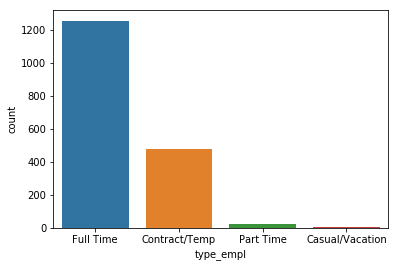

In [59]:
frame1['type_empl'].value_counts()
sns.countplot(x='type_empl',data=frame1)

In [63]:
frame1['title'].value_counts()

Business Analyst Job in Sydney - SEEK                                                          9
Senior Business Analyst Job in Sydney - SEEK                                                   8
Business Analyst  Job in Sydney - SEEK                                                         7
Financial Analyst Job in Sydney - SEEK                                                         7
Management Accountant Job in Melbourne - SEEK                                                  7
Test Analyst Job in Brisbane - SEEK                                                            7
Data Analyst Job in Melbourne - SEEK                                                           6
Postdoctoral Research Fellow Job in Brisbane - SEEK                                            6
Finance Analyst Job in Melbourne - SEEK                                                        6
Senior Commercial Analyst Job in Sydney - SEEK                                                 5
Store Manager Job in Sydney - 

In [64]:
frame1['wage'].value_counts()

100000.0     44
130000.0     40
90000.0      39
120000.0     38
115000.0     38
140000.0     35
85000.0      34
110000.0     33
95000.0      31
135000.0     30
125000.0     28
150000.0     27
105000.0     27
65000.0      24
75000.0      23
195000.0     23
70000.0      22
80000.0      22
145000.0     17
175500.0     17
200000.0     16
208000.0     16
67500.0      15
60000.0      13
62500.0      12
79999.5      12
77500.0      12
234000.0     12
165000.0     11
188500.0     11
             ..
40032.5       1
211575.0      1
132600.0      1
61676.0       1
47545.0       1
140400.0      1
135200.0      1
154999.5      1
1243125.0     1
1447875.0     1
179400.0      1
31200.0       1
104124.5      1
49500.0       1
63015.5       1
200500.0      1
85070.0       1
234650.0      1
88725.0       1
225000.0      1
260000.0      1
73034.5       1
100425.0      1
219180.0      1
400000.0      1
55328.0       1
70200.0       1
113100.0      1
108225.0      1
8320.0        1
Name: wage, Length: 449,

In [13]:
frame1['content'] = frame1['content'].map(lambda row: re.sub(regex_html,'',row))

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
no = 0
print(frame1['url'].iloc[no])
print("======================")
print(frame1['wage'].iloc[no])
print("======================")
frame1['content'].iloc[no]

https://www.seek.com.au/job/38988764?type=standout&searchrequesttoken=7dd0818a-ae26-4408-918c-981552979733
128171


"Salary from $118,513 to $137,829 (depending on experience) + 15.4% superannuation Flexible location - Sydney or Melbourne CBD Lead a small team, contributing to the regulation of Australia's Wealth Management industry A future with ASIC means that your work will contribute to ASIC's vision for a fair, strong and efficient financial system for all Australians. We value what you will bring. We value those with sharp, analytical minds and are open to challenging the way things are done. The team Wealth Management is a critical part of Australia's financial system and has significant impact on the well-being of Australians. The role of ASIC's Wealth Management Group is to regulate the conduct of investment managers, superannuation funds and financial advisers. The Strategy, Analysis & Operations team provides specialist services to support the work of the Wealth Management Group. It provides strategic guidance on business planning and reporting, management of group performance, budget pla